## Neural networks: Multi Layer Perceptron

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler

Now that we understand how the perceptron works, we are ready to start learning about deep neural networks. The primary deep neural network used for (both regression and) classification is the multi-layer perceptron (MLP). A graphical representation of a MLP follows:

In [5]:
from IPython.display import HTML 
HTML('<iframe src=./MLP.pdf width=700 height=700></iframe>')

Each of the nodes in the graph is known as neurons, to mantain the parallelism with the neural network denomination. However, they are nothing but perceptrons located one besides the other, or in sequential order.

sklearn has one classifier that consists of a common MLP; MLPClassifier. It can be used as any other classifier seen in the subject so far.

## Exercise 1

Understanding how a neural network works is a very difficult task, and is yet to be completely solved. A common approach to this problem is to visualize the coefficients generated while training, so that it can be seen what areas of the data are more relevant to the classifier. In this exercise, we are tackling the common problem of clasifying hand-written digits.

1) See how the data containing the hand-written digits is loaded, and treated, so that we can use it with a regular MLP

2) Train the classifier with the obtained data

3) Use the visualize_coefs function to graphically show the coefficients of the first hidden layer. Interpret that result.

In [6]:
def visualize_coefs(clf):
    """
    clf must be the instanced (and trained) classifier
    """
    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
    for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
        ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

Iteration 1, loss = 2.78019142
Iteration 2, loss = 2.05942584
Iteration 3, loss = 1.84911445
Iteration 4, loss = 1.74397931
Iteration 5, loss = 1.53046272
Iteration 6, loss = 1.39126937
Iteration 7, loss = 1.34717709
Iteration 8, loss = 1.31689307
Iteration 9, loss = 1.29753940
Iteration 10, loss = 1.27818575


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


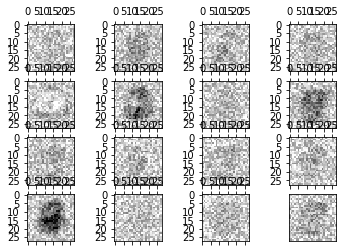

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.reshape(X_train, (60000, 28*28))
X_test = np.reshape(X_test, (10000, 28*28))

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1)

mlp.fit()

Lets see "what" exactly the network has learned

In [19]:
print(mlp.coefs_[0].shape)  # First weight layer (mapping from input to first hidden layer)
print(mlp.coefs_[1].shape)  # Second weight layer (mapping from first hidden layer to second)
print(mlp.coefs_[2].shape)  # Third weight layer (mapping from second hidden layer to output)

print(mlp.intercepts_[0].shape)  # Bias component added in the first hidden layer
print(mlp.intercepts_[1].shape)  # Bias component added in the second hidden layer
print(mlp.intercepts_[2].shape)  # Bias component added in the output

(784, 100)
(100, 100)
(100, 10)
(100,)
(100,)
(10,)


## Exercise 2

Now that we know how to create a MLP the easy way, we are going to give one step further, and design a MLP using tensorflow from scratch.

1) Using the same technique used in the tensorflow notebook, design a MLP using tensorflow. Following the notation used in the previous notebook to formalize the linear models (y = W*X + b), a one-hidden-layer MLP can be defined as y = (W1*X + b1)*W2 + b2. The rest of the tensorflow components (loss function, optimizer, ...) need no changes to work with this model.

2) Use the designed MLP to learn a classifier for the MNIST dataset that was used in the example.

3) Modify the visualize_coefs function so that it can show the coefficients in the first layer of the learned network.